In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

img_dir = 'dataset/fulldose/fulldoseP-68719.PT.602.PET_LISTMODE.2023.11.19.09.30.20.596000.2.0.432333670_RECON_cuda_iter_20.img'
input_shape = (400, 400, 400)

imgs = np.fromfile(img_dir, dtype=np.float32)
imgs = imgs.reshape(input_shape).transpose(1, 2, 0)
imgs = imgs[18:(18+363), 18:(18+363), 68:332]
# sns.heatmap(imgs[:, :, 67+264], square=True, cmap='gray')
# plt.show()
# reshaped_imgs = (imgs[:, :, ::2]+imgs[:, :, 1::2])/2

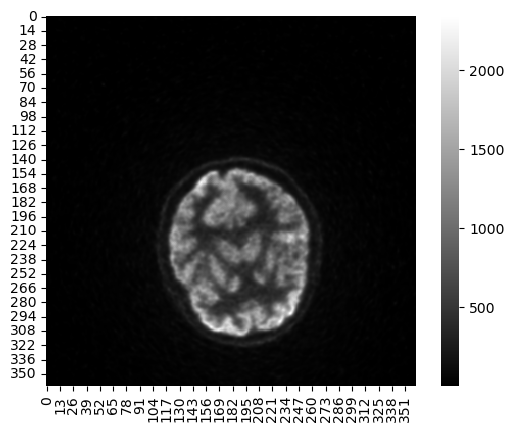

In [12]:
# img = imgs[:, :, imgs.shape[2]//2]
img = imgs[:, :, 199]
sns.heatmap(img, square=True, cmap='gray')
plt.show()

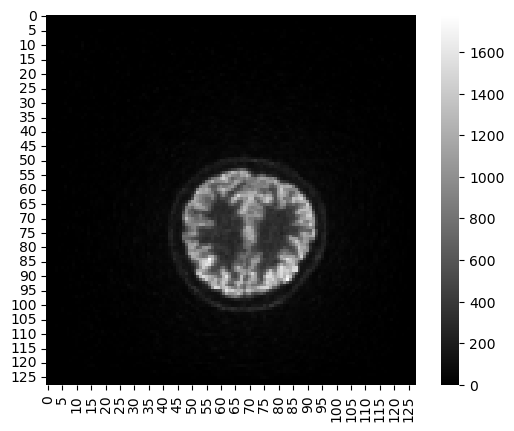

In [53]:
import torch
import torchvision.transforms as transforms

resize_shape = (128, 128)
transform = transforms.Compose([
        transforms.Resize(resize_shape, antialias=False)
    ])
# print(img.shape)
img = transform(torch.tensor(img).unsqueeze(0))

sns.heatmap(img[0, :, :], square=True, cmap='gray')
plt.show()

In [6]:
import os
import numpy as np

def findAllFile(base):
    for root, ds, fs in os.walk(base):
        for f in fs:
            yield f

dataset_dir = 'dataset/fulldose/'
# minn = 1e9
maxn = -1
mark = ""
position = -1
for file in findAllFile(dataset_dir):
    tmp = np.fromfile(os.path.join(dataset_dir, file), dtype=np.float32)
    tmp_maxn = np.max(tmp)
    maxn = max(tmp_maxn, maxn)
    # minn = min(np.min(tmp), minn)
    if maxn == tmp_maxn: 
        mark = file
        position = np.where(tmp == maxn)

print(f"The max pixel value is {maxn}, contained in file {mark} located at the ({position[0]%(400**2)/400}, {position[0]%(400**3)/(400**2)}, {position[0]/(400**3)})-th element.")

The max pixel value is 4.603138811883005e+35, contained in file fulldoseP-68719.PT.602.PET_LISTMODE.2023.11.19.09.30.20.596000.2.0.432333670_RECON_cuda_iter_20.img located at the ([0.905], [331.0022625], [0.82750566])-th element.
